In [2]:
# Imports (some imports may not be necessary)
import numpy as np
import math
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

from qiskit.quantum_info import Kraus, SuperOp

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit



from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.library import SaveState

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error


from qiskit.test.mock import FakeVigo
from qiskit import QuantumCircuit
from qiskit.providers.aer import extensions  # import aer snapshot instructions
from qiskit import execute

from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer


In [3]:
p_bitFlip = 0.36
error_gate1 = pauli_error([('X',1-p_bitFlip), ('I',p_bitFlip)])
noise_bit_flip = NoiseModel()

noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ['id','u1','u2','u3'])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u3', 'u2', 'id']
  All-qubits errors: ['id', 'u1', 'u2', 'u3']


     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ I ├
     └───┘
DensityMatrix([[0.18+0.j, 0.18+0.j, 0.  +0.j, 0.  +0.j],
               [0.18+0.j, 0.18+0.j, 0.  +0.j, 0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.32+0.j, 0.32+0.j],
               [0.  +0.j, 0.  +0.j, 0.32+0.j, 0.32+0.j]],
              dims=(2, 2))


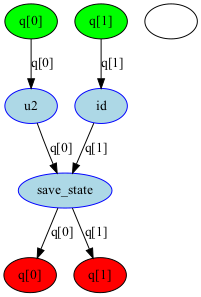

In [4]:
# Create noisy simulator backend
sim_noise = AerSimulator(method = "density_matrix", noise_model=noise_bit_flip)

# System Specification
n_qubits = 2
circTest = QuantumCircuit(n_qubits)

# Test Circuit
circTest.h(0)
circTest.id(1)

print(circTest)

circ_tnoise = transpile(circTest, sim_noise, optimization_level = 0)
circ_tnoise.save_state()



# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
print(result_bit_flip.results[0].data.density_matrix)


dagTest = circuit_to_dag(circ_tnoise)
dag_drawer(dagTest)


h


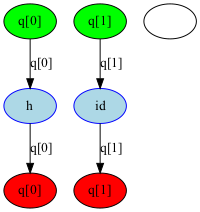

In [45]:
circTest = QuantumCircuit(2)
circTest.h(0)
circTest.id(1)
dag = circuit_to_dag(circTest)

print(dag.op_nodes()[0].name)
test = dag.multigraph_layers()
#for i in test:
#    for j in i:
#        print(j)
dag_drawer(dag)

In [1]:
#Modelling Correlated Noise Events in Qiskit
from qiskit.transpiler.basepasses import TransformationPass
from qiskit.transpiler.passes import CrosstalkAdaptiveSchedule
from qiskit.test.mock import FakeAlmaden
from qiskit.dagcircuit import DAGCircuit 
backend = FakeAlmaden()
props = backend.properties()

crosstalk_prop = {(0,1): {(2):0.3}}
test = CrosstalkAdaptiveSchedule(props, crosstalk_prop)
print(test.run(dag))

NameError: name 'Optimize' is not defined